<h2>Intoduction</h2>
<br>
This notebook is analyzing accuracies on test data of traines models. We would like to analyze accuracy, test hypothesis, whether all networks have same results and if we have only one best network. We will be using anova and confidence itnervals.

### Load and data preprocessing section

#### Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pathlib
from PIL import Image
import itertools
import tqdm
import cv2
import seaborn as sns
import matplotlib.colors as mcolors
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as st

#### Get list of files

In [3]:
list_of_files = {
    "deeplabv3":pathlib.Path(r"C:\Projects\tasks\mud_detection_stats\inputs\Training_records\deeplabv3\metrics.csv"),
    "segnetwithresnet50":pathlib.Path(r"C:\Projects\tasks\mud_detection_stats\inputs\Training_records\resnet50_segnet\metrics.csv"),
    "unetwithresnet50":pathlib.Path(r"C:\Projects\tasks\mud_detection_stats\inputs\Training_records\resnet50_unet\metrics.csv"),
    "unetsmall":pathlib.Path(r"C:\Projects\tasks\mud_detection_stats\inputs\Training_records\unet_small\metrics.csv"),
    "unet_predefined":pathlib.Path(r"C:\Projects\tasks\mud_detection_stats\inputs\Training_records\unet2\metrics.csv"),
    "segnetwithvgg":pathlib.Path(r"C:\Projects\tasks\mud_detection_stats\inputs\Training_records\vgg_segnet\metrics.csv"),
    "unetwithvgg":pathlib.Path(r"C:\Projects\tasks\mud_detection_stats\inputs\Training_records\vgg_unet\metrics.csv"),
}

#### Read all stats file to get IoU and accuracy

In [4]:
pd_complete_df = pd.DataFrame(columns=['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr', 'epoch'])
for network_name, file_path in list_of_files.items():
    df_tmp = pd.read_csv(file_path)
    df_tmp["network"] = network_name
    df_tmp.rename(columns={'Unnamed: 0':'epoch'}, inplace=True)
    pd_complete_df = pd.concat([pd_complete_df, df_tmp], axis = 0)
pd_complete_df

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Projects\\tasks\\mud_detection_stats\\inputs\\Training_records\\deeplabv3\\metrics.csv'

### Visualize results

In [ ]:
list_of_colors = list(mcolors.CSS4_COLORS.keys())

fig = plt.figure(figsize= (10, 10))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212, sharex = ax1)

ax1.set_title("Plot of accuracies", fontsize= 20)

data = []
for network_id, network_name in enumerate(pd_complete_df["network"].unique()):
    tmp_df = pd_complete_df[pd_complete_df["network"]==network_name]
    ax1.plot(tmp_df["epoch"], tmp_df["accuracy"], color=list_of_colors[network_id+25],
     linewidth=2, markersize=12, label = network_name+" training set")
    ax2.plot(tmp_df["epoch"], tmp_df["val_accuracy"], color=list_of_colors[network_id+25],
     linewidth=2, markersize=12, label = network_name+" validation set")
ax1.legend()
ax2.legend()
plt.xlabel("Epoch")
plt.ylabel("Accuracy Score")
plt.show()

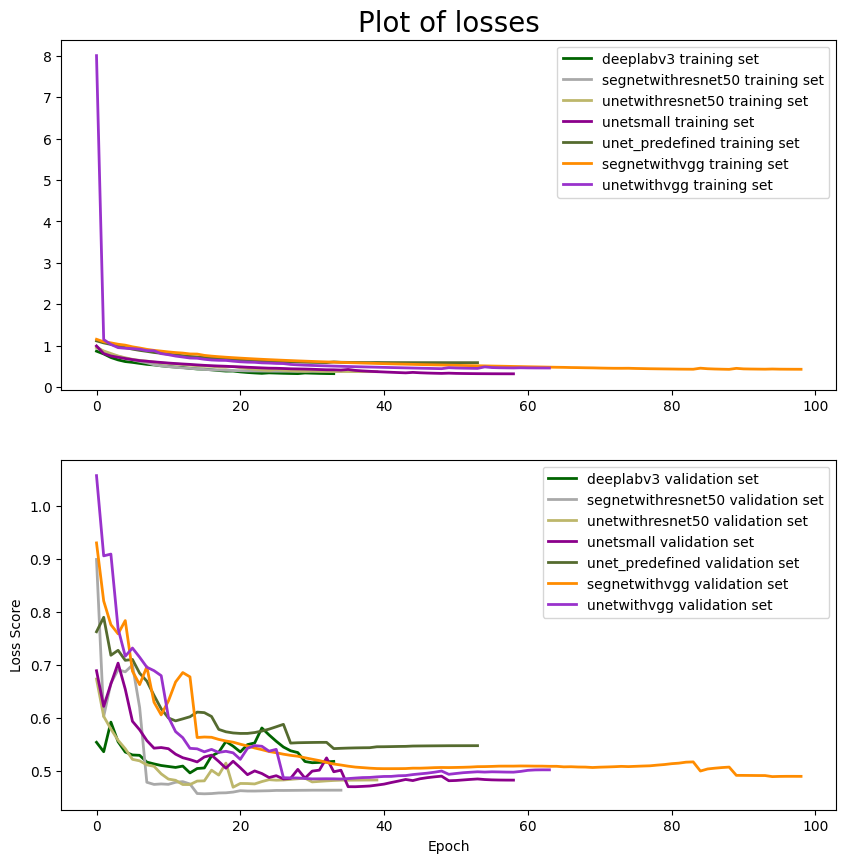

In [92]:
fig = plt.figure(figsize= (10, 10))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212, sharex = ax1)

ax1.set_title("Plot of losses", fontsize= 20)

data = []
for network_id, network_name in enumerate(pd_complete_df["network"].unique()):
    tmp_df = pd_complete_df[pd_complete_df["network"]==network_name]
    ax1.plot(tmp_df["epoch"], tmp_df["loss"], color=list_of_colors[network_id+25],
     linewidth=2, markersize=12, label = network_name+" training set")
    ax2.plot(tmp_df["epoch"], tmp_df["val_loss"], color=list_of_colors[network_id+25],
     linewidth=2, markersize=12, label = network_name+" validation set")
ax1.legend()
ax2.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss Score")
plt.show()

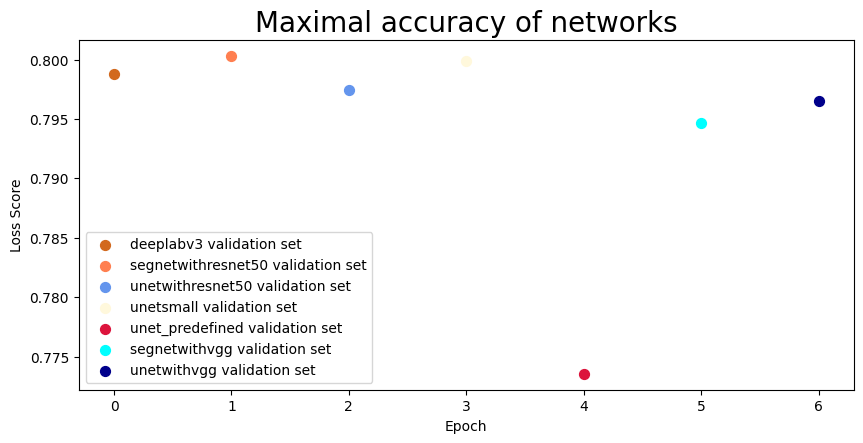

In [103]:
fig = plt.figure(figsize= (10, 10))
ax1 = plt.subplot(211)

ax1.set_title("Maximal accuracy of networks", fontsize= 20)
data = []
for network_id, network_name in enumerate(pd_complete_df["network"].unique()):
    tmp_df = pd_complete_df[pd_complete_df["network"]==network_name]
    ax1.scatter(network_id, tmp_df["val_accuracy"].max(), color=list_of_colors[network_id+15],
     s=50, label = network_name+" validation set")
ax1.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss Score")
plt.show()

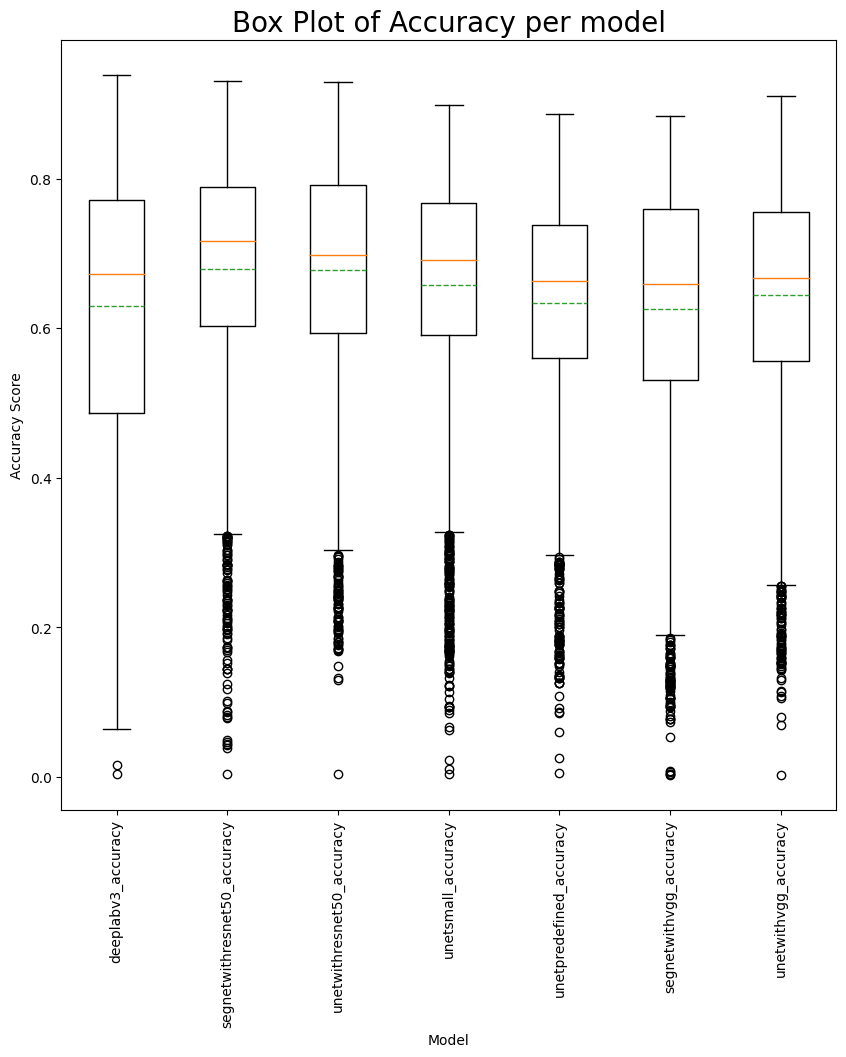

In [294]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Accuracy per model", fontsize= 20)
ax.set

data = []
for column in list(pd_complete_df.columns):
    data.append(pd_complete_df[column])

ax.boxplot(data,
           labels= list(pd_complete_df.columns),
           showmeans= True, 
            meanline =True)

plt.xlabel("Model")
plt.ylabel("Accuracy Score")
plt.xticks(rotation=90)
plt.show()